<a href="https://colab.research.google.com/github/Parths131/arima-odisha/blob/main/arima_implementation_tourist_in_odisha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving historical-data-of-odisha.csv to historical-data-of-odisha.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from datetime import timedelta
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller

In [ ]:
path = '/content/historical-data-of-odisha.csv'
df = pd.read_csv(path)

In [ ]:
order = (1, 2, 2)

In [ ]:
df = df[6:17]

In [ ]:
df_excluded = df[['Year', 'Tourist in Odisha']]

In [ ]:
df_excluded.dtypes

Year                  int64
Tourist in Odisha    object
dtype: object

In [ ]:
df_excluded

,Year,Tourist in Odisha
6,2009,"65,24,516"
7,2010,"71,51,184"
8,2011,"78,23,953"
9,2012,"85,35,024"
10,2013,"93,57,256"
11,2014,"1,01,31,472"
12,2015,"1,11,23,566"
13,2016,"1,21,35,059"
14,2017,"1,31,90,224"
15,2018,"1,43,64,541"


In [ ]:
df_excluded['Tourist in Odisha'] = df_excluded['Tourist in Odisha'].str.replace(',', '').astype(int)

<ipython-input-119-284d54549605>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded['Tourist in Odisha'] = df_excluded['Tourist in Odisha'].str.replace(',', '').astype(int)


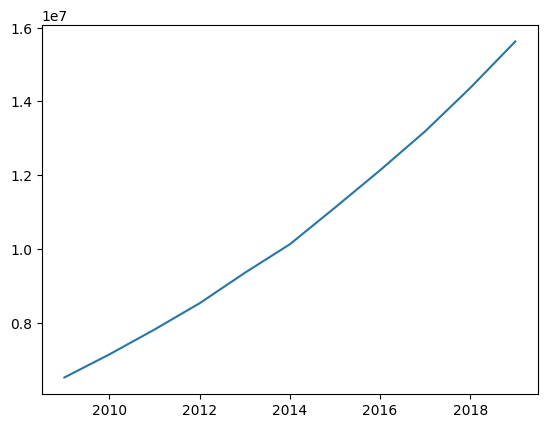

In [ ]:
plt.plot(df_excluded['Year'], df_excluded['Tourist in Odisha'])

In [ ]:
adf_test = adfuller(df_excluded['Tourist in Odisha'])

print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

ADF Statistic: 3.117031734025386
p-value: 1.0


In [ ]:
df_diff = df_excluded['Tourist in Odisha'].diff().dropna()

In [ ]:
adf_test = adfuller(df_diff)

print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

ADF Statistic: 0.8576648474544243
p-value: 0.9925122068356335


In [ ]:
df_diff2 = df_diff.diff().dropna()

In [ ]:
adf_test = adfuller(df_diff2)

print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

ADF Statistic: -3.5045589253584635
p-value: 0.007870780227101918


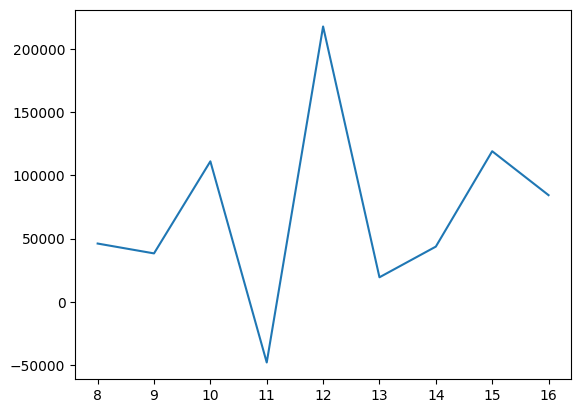

In [ ]:
plt.plot(df_diff2)

In [ ]:
df_train  = df_excluded[:8]
df_test = df_excluded[8:]

In [ ]:
df_test

,Year,Tourist in Odisha
14,2017,13190224
15,2018,14364541
16,2019,15623250


In [ ]:
testing_range = pd.date_range(start=datetime(2017, 1, 1), end=datetime(2019, 12, 31), freq='YS')

model = ARIMA(df_train['Tourist in Odisha'], order=order)
model_fit = model.fit()

testing = model_fit.forecast(steps=len(testing_range))

testing_df = pd.DataFrame({'Year': testing_range.year, 'Tourist in Odisha': testing})

print(testing_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


    Year  Tourist in Odisha
14  2017       1.315081e+07
15  2018       1.416952e+07
16  2019       1.519034e+07


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
rmse = np.sqrt(np.mean((df_test['Tourist in Odisha'] - testing_df['Tourist in Odisha']) ** 2))

mae = np.mean(np.abs(df_test['Tourist in Odisha'] - testing_df['Tourist in Odisha']))

rmse, mae

(275073.08944229176, 222448.24153281996)

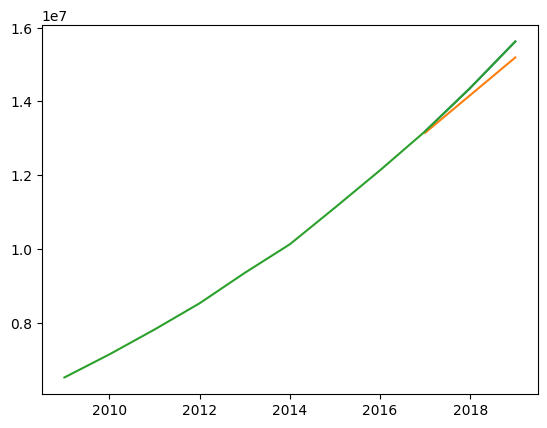

In [ ]:
plt.plot(df_test['Year'], df_test['Tourist in Odisha'], label='Actual')
plt.plot(testing_df['Year'], testing_df['Tourist in Odisha'], label='Predicted')
plt.plot(df_excluded['Year'], df_excluded['Tourist in Odisha'], label='Predicted')

In [ ]:
forecast_range = pd.date_range(start=datetime(2020, 1, 1), end=datetime(2049, 12, 31), freq='YS')

model = ARIMA(df_excluded['Tourist in Odisha'], order=order)
model_fit = model.fit()

predictions = model_fit.forecast(steps=len(forecast_range))

predictions_df = pd.DataFrame({'Year': forecast_range.year, 'Tourist in Odisha': predictions})

print(predictions_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


    Year  Tourist in Odisha
17  2020       1.692326e+07
18  2021       1.831068e+07
19  2022       1.978421e+07
20  2023       2.134255e+07
21  2024       2.298441e+07
22  2025       2.470856e+07
23  2026       2.651375e+07
24  2027       2.839876e+07
25  2028       3.036239e+07
26  2029       3.240347e+07
27  2030       3.452082e+07
28  2031       3.671331e+07
29  2032       3.897979e+07
30  2033       4.131917e+07
31  2034       4.373033e+07
32  2035       4.621222e+07
33  2036       4.876375e+07
34  2037       5.138389e+07
35  2038       5.407161e+07
36  2039       5.682588e+07
37  2040       5.964571e+07
38  2041       6.253011e+07
39  2042       6.547812e+07
40  2043       6.848877e+07
41  2044       7.156112e+07
42  2045       7.469425e+07
43  2046       7.788724e+07
44  2047       8.113920e+07
45  2048       8.444923e+07
46  2049       8.781647e+07


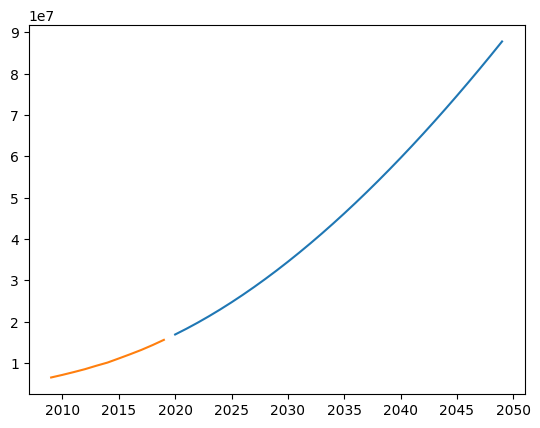

In [ ]:
plt.plot(predictions_df['Year'], predictions_df['Tourist in Odisha'], label='Predicted')
plt.plot(df_excluded['Year'], df_excluded['Tourist in Odisha'], label='Predicted')

In [ ]:
testing_seq = df_train.copy()

model = ARIMA(testing_seq['Tourist in Odisha'], order=order)
model_fit = model.fit()

for testing_year in testing_range:

    pred = model_fit.forecast(steps=1)

    testing_seq = pd.concat([testing_seq, pd.DataFrame({'Year': [testing_year.year], 'Tourist in Odisha': [pred.iloc[0]]})], ignore_index=True)

    model = ARIMA(testing_seq['Tourist in Odisha'], order=order)
    model_fit = model.fit()

print(testing_seq)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


    Year  Tourist in Odisha
0   2009       6.524516e+06
1   2010       7.151184e+06
2   2011       7.823953e+06
3   2012       8.535024e+06
4   2013       9.357256e+06
5   2014       1.013147e+07
6   2015       1.112357e+07
7   2016       1.213506e+07
8   2017       1.315081e+07
9   2018       1.416936e+07
10  2019       1.518992e+07


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
testing_seq = testing_seq.iloc[8:]

In [ ]:
df_test = df_test.reset_index(drop=True)
testing_seq = testing_seq.reset_index(drop=True)

In [ ]:
testing_seq

,Year,Tourist in Odisha
0,2017,1.315081e+07
1,2018,1.416936e+07
2,2019,1.518992e+07


In [ ]:
rmse = np.sqrt(np.mean((df_test['Tourist in Odisha'] - testing_seq['Tourist in Odisha']) ** 2))

mae = np.mean(np.abs(df_test['Tourist in Odisha'] - testing_seq['Tourist in Odisha']))

rmse, mae

(275329.2745915738, 222638.84988939515)

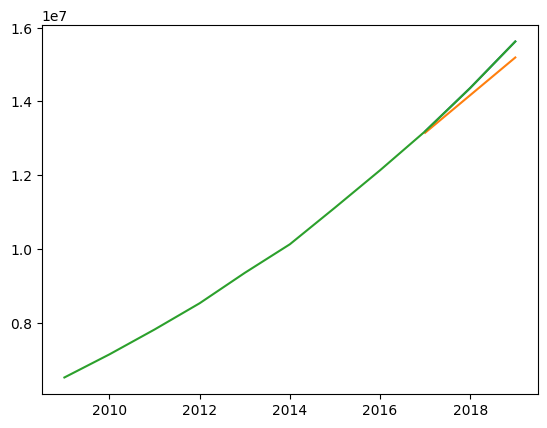

In [ ]:
plt.plot(df_test['Year'], df_test['Tourist in Odisha'], label='Actual')
plt.plot(testing_seq['Year'], testing_seq['Tourist in Odisha'], label='Predicted')
plt.plot(df_excluded['Year'], df_excluded['Tourist in Odisha'], label='Predicted')

In [ ]:
predictions_seq = df_excluded.copy()

forecast_range = pd.date_range(start=datetime(2020, 1, 1), end=datetime(2049, 12, 31), freq='YS')
model = ARIMA(predictions_seq['Tourist in Odisha'], order=order)
model_fit = model.fit()

for forecast_year in forecast_range:

    pred = model_fit.forecast(steps=1)

    predictions_seq = pd.concat([predictions_seq, pd.DataFrame({'Year': [forecast_year.year], 'Tourist in Odisha': [pred.iloc[0]]})], ignore_index=True)

    model = ARIMA(predictions_seq['Tourist in Odisha'], order=order)
    model_fit = model.fit()

print(predictions_seq)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning

    Year  Tourist in Odisha
0   2009       6.524516e+06
1   2010       7.151184e+06
2   2011       7.823953e+06
3   2012       8.535024e+06
4   2013       9.357256e+06
5   2014       1.013147e+07
6   2015       1.112357e+07
7   2016       1.213506e+07
8   2017       1.319022e+07
9   2018       1.436454e+07
10  2019       1.562325e+07
11  2020       1.692326e+07
12  2021       1.817277e+07
13  2022       1.947788e+07
14  2023       2.083904e+07
15  2024       2.225624e+07
16  2025       2.372942e+07
17  2026       2.525850e+07
18  2027       2.684352e+07
19  2028       2.848453e+07
20  2029       3.018143e+07
21  2030       3.193448e+07
22  2031       3.374354e+07
23  2032       3.560862e+07
24  2033       3.752979e+07
25  2034       3.950712e+07
26  2035       4.154053e+07
27  2036       4.362992e+07
28  2037       4.577522e+07
29  2038       4.797661e+07
30  2039       5.023364e+07
31  2040       5.254676e+07
32  2041       5.491588e+07
33  2042       5.734087e+07
34  2043       5.982

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


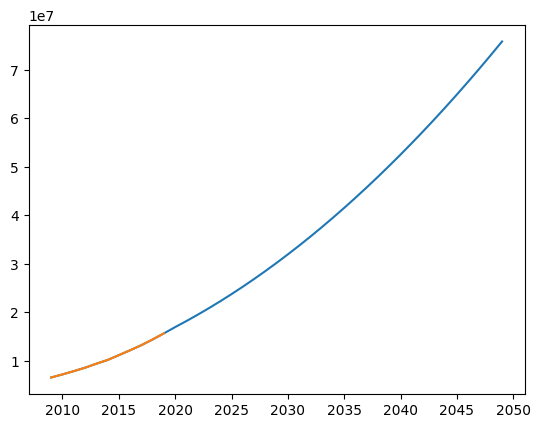

In [ ]:
plt.plot(predictions_seq['Year'], predictions_seq['Tourist in Odisha'], label='Predicted')
plt.plot(df_excluded['Year'], df_excluded['Tourist in Odisha'], label='Predicted')